In [1]:
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Image
import sys
sys.path.append('library/')

Edit Jupyter Notebook formatting:

Edit Pyplot formatting:

In [2]:
params = {'legend.fontsize': 15,
          'figure.figsize': (12, 8),
         'axes.labelsize': 15,
         'axes.titlesize':15,
         'xtick.labelsize':12,
         'ytick.labelsize':12}
plt.rcParams.update(params)

# Fluid Flow Over a Wavy Bedform

The following is based on an example problem presented by Dr. David Furbish in his text *Fluid Physics in Geology* (Chapter 15.8.3). For a more detailed mathematical treatment, which was completed under the supervision of Dr. Furbish, see "Fluid Flow Over A Wavy Bedform.pdf" in the parent directory.

## Introduction
Imagine a natural stream flowing down a very gentle incline. Natural stream beds are rough and geometrically complex; flow over such beds is hard to characterize due to its turbulent and 3-dimensional nature. We might try to understand the behavior of streamflow over rough bedforms by first attempting to describe flow over simplified bedforms that can be described geometrically. For example, we could imagine flow over a wavy bedform and describe the wavy bedform with a sinusoidal function. A sinusoidal wave with amplitude $\eta_0$ and wavelength $\lambda$ looks like this:

![Sinusoidal Function](images/bedform_diagram.png)

Characterizing flow over a wavy bedform is a first step towards understanding flow over more complex geometries; however, even characterizing flow over a wavy bedform requires making many mathematically simplifying assumptions. Imagine stream flow in a straight channel of uniform width where the positive x-axis points downstream and parallel to the stream bed (inclined coordinate system), the y-axis goes across the stream from one bank to the other, and the z-axis is normal to the stream bed with the positive direction upward. Because the stream is of uniform width we neglect flow near the banks, ignore flow in the y-direction, and approximate flow in the center of the channel. We can describe this two-dimensional flow using two components of the Navier-Stokes equation and a simplified continuity equation,	

$u \frac{\partial u}{ \partial x} + w \frac{\partial u}{\partial z} = -\frac{1}{\rho} \frac{\partial p}{\partial x} - g \frac{\partial z_0}{\partial x} + \frac{1}{\rho} \Big( \frac{\partial}{\partial x} \tau_{xx} + \frac{\partial}{\partial z}\tau_{zx}\Big)$

$u \frac{\partial w}{ \partial x} + w \frac{\partial w}{\partial z} = -\frac{1}{\rho} \frac{\partial p}{\partial z} - g \frac{\partial z_0}{\partial z} + \frac{1}{\rho} \Big( \frac{\partial}{\partial x} \tau_{xz} + \frac{\partial}{\partial z}\tau_{zz}\Big)$

$\frac{\partial u}{\partial x} + \frac{\partial w}{\partial z} = 0$

where $z_0$ is a vertical coordinate in the Earth's reference frame.

These equations are complicated and likely do not have analytical solutions. We can simplify them and eliminate all nonlinear terms by following many mathematical steps. In simplifying the equations, we make two main assumptions worth mentioning here. The first assumption is that the sinuisoidal waveform of the stream bed has an amplitude that is much smaller than the wavelength. The second is that we can describe stresses at the streambed as a function of streamwise velocity and a friction coefficient, $\Gamma$, which is common to the engineering literature and similar to a Darcy-Weisbach coefficient. 

In addition to making these two assumptions, we depth-average each term in the above three equations, linearize the equations by following a method similar to Reynolds averaging, and remove all second-order and higher terms. In doing so, we find first order solutions to the above equations. Our equations above eventually simplify to the following two equations 

$\frac{1}{U}\frac{\partial u^\prime}{\partial x} + \frac{g}{U^2} \frac{\partial \zeta^\prime}{\partial x} - \frac{\Gamma}{H^2} \zeta^\prime + \frac{2 \Gamma}{H U} u^\prime = - \frac{\Gamma}{H^2} \eta^\prime $

and 

$\frac{1}{U} \frac{\partial u^\prime}{\partial x} + \frac{1}{H} \frac{\partial \zeta^\prime}{\partial x} = \frac{1}{H} \frac{\partial \eta^\prime}{\partial x}$

where the prime (tick) notation indicates that the variable represents perturbations around a reach-averaged value. For example, streamwise velocity $u$ is equal to a reach-averaged value (a chosen parameter) and perturbations around that value, $u = U + u^\prime$. Our mathematical assumptions allow us to find first-order analytical solutions for the height of the fluid surface, $\zeta$, and the depth-averaged fluid velocity, $u$, as functions of streamwise distance, x. These solutions that are based on the assumption that the streambed geometry can be described by the sinusoidal function 

$ \eta = E + \eta_0 cos(\frac{2 \pi}{\lambda} x) $

where $E$ is the average elevation of the bedform (an arbitrary value that holds no real importance, we can set it to 0), $\eta_0$ is the amplitude of the streambed waveform, and $\lambda$ is the wavelength of the streambed waveform. The solutions for $\zeta$ and $u$ are also sinusoids. The solution for fluid surface height is 

$ \zeta = H + \zeta_0 cos(\frac{2 \pi}{\lambda} x + \phi_\zeta)$

where $H$ is the average depth of the fluid (for which we select a constant value), $\zeta_0$ is the amplitude of the fluid surface waveform, and $\phi_\zeta$ is the phase angle offsetting the waveform of the fluid surface from the waveform of the streambed waveform. The solution for the depth-averaged fluid velocity, which from here on we refer to as $u$, is

$ u = U + u_0 cos ( \frac{2 \pi}{\lambda} x + \phi_u)$

where $U$ is the average streamwise velocity of the fluid (for which we select a constant value), $u_0$ is the amplitude of the of the streamwise velocity waveform, and $\phi_u$ is the phase angle offsetting the waveform of the streamwise velocity from the waveform of the streambed waveform. Furthermore, we have equations for the amplitudes $\zeta_0$ and $\eta_0$ and the phase angles $\phi_\zeta$ and $\phi_u$,

$u_0 = \frac{U}{H} \frac{\beta \omega}{\sqrt{9\alpha^2 + \omega^2(1 - \beta)^2}} \eta_0 $,

$\zeta_0 = \frac{\sqrt{9 \alpha^2 + \omega^2}}{\sqrt{9\alpha^2 + \omega^2(1 - \beta)^2}} \eta_0$,

$\phi_u = -\frac{\pi}{2} - 
    tan^{-1}\Big( \frac{\omega (1 - \beta)}{3 \alpha}\Big)$,
    
and

$\phi_\zeta = tan^{-1}\Big( \frac{\omega}{3 \alpha} \Big) - tan^{-1}\Big( \frac{\omega (1 - \beta)}{3 \alpha}\Big)$

where

$\alpha = \frac{\Gamma}{H}, \quad \beta = \frac{g H}{U^2}, \quad \text{and} \quad \omega = \frac{2 \pi}{\lambda}$.

We can plot $\eta$, $\zeta$, and $u$ by defining only the parameters $\Gamma, H, g, U, \lambda, \eta_0$ which represent, respectively, a friction coefficient, reach-averaged fluid depth, Earth's gravitational constant, reach-averaged streamwise velocity, the bedform wavelength, and the bedform wave amplitude.

Literature suggests that $\Gamma$ is generally on the order of 0.01 (Furbish, 1998). We might imagine that a reasonable natural stream might have an average fluid depth $H$ between 1 and 10 meters and an average streamwise velocity $U$ between 1 and 10 meters per second (although on the higher end of this scale). Streambed waveform wavelength might vary significantly and we might experiment with values from 1 to 100. Streambed waveform amplitudge should be significantly smaller than wavelength (according to an assumption we made earlier), and we might imagine a streambed to vary a couple centimeters (say, 0.05 meters) for the smaller wavelength and maybe larger for the larger wavelength (say, 0.5 meters), although this only seems likely if average water depth is very large. Regardless, we can see from our equations that bedform amplitude $\eta_0$ only scales the ampltides of the water surface height and velocity waveforms proportionally and so is not particularly interesting.

Let's set some parameters and get plotting!

In [3]:
gamma = 0.01
H = 1.0 # meters
g = 9.81 # meters per second
U = 1.0 # meters
lamb = 100 #meters, in place of lambda b/c lambda is a py keyword
eta0 = 0.05 #meters

We create a simple function (using our equations above) that returns the streambed, fluid surface, and fluid velocity waveforms when provided the six parameters listed above and an x-domain over which to plot.

In [4]:
#Parameters: 
#        n0 - float, bed waveform amplitude
#        lamb - float, bed waveform wavelength
#        U - float, average streamwise velocity
#        g - float, gravitational acceleration
#        H - float, average fluid depth
#        gamm - float, friction coefficient
#        x - float, x-domain over which to calculate solutions
#returns: 
#        n_ - float array, stream bed waveform over the x-domain provided
#        z_ - float array, height of the fluid surface over the streambed over the x-domain provided
#        u_ - float array, depth-averaged streamwise velocity over the x-domain provided
def getPlots(n0, lamb, U, g, H, gamm, x):
    alpha = gamm/H
    beta = g*H/U**2
    omega = 2*np.pi/lamb
    u0 = (U/H)*n0*beta*omega/np.sqrt(9*alpha**2 + omega**2*(1-beta)**2)
    z0 = n0*(9*alpha**2 + omega**2)/np.sqrt(9*alpha**2 + omega**2*(1-beta)**2)
    phi_u = -np.pi/2 - np.arctan(omega*(1-beta)/(3*alpha))
    phi_z = np.arctan(omega/(3*alpha)) - np.arctan(omega*(1-beta)/(3*alpha))    
    n_ = n0*np.cos(omega*x)
    u_ = u0*np.cos(omega*x + phi_u)
    z_ = z0*np.cos(omega*x + phi_z)
    return(n_, z_, u_)

Lets plot using the parameters above. First we set up Pyplot so that we can plot all three waveforms neatly next to eachother.

In [5]:
#Set up our figure to contain 3 subplots
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(12,8))
# Remove horizontal space between axes of the 3 subplots
fig.subplots_adjust(hspace=.1)
#set our x-domain
x = np.linspace(0,lamb,1000)
#retrieve plots
bedform, surface, velocity = getPlots(eta0, lamb, U, g, H, gamma, x)

Plot all three waveforms (and make the plots pretty with too many lines of code):

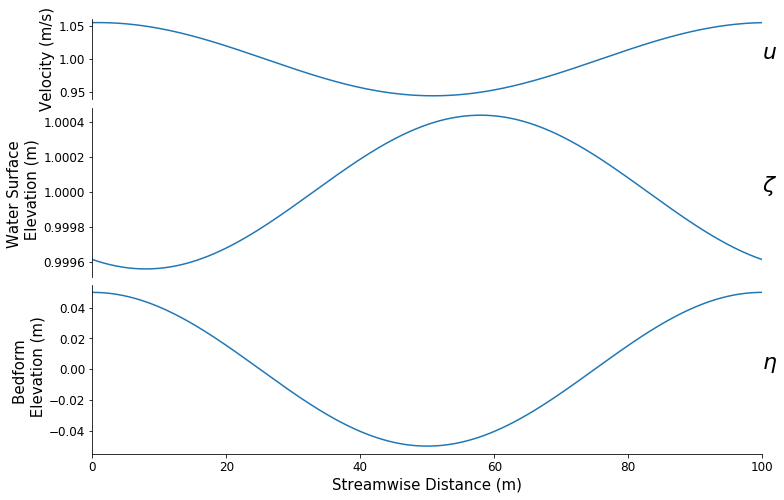

In [6]:
# Plot streambed waveform:
plt.subplot2grid((5,3), (3,0), colspan=3, rowspan=2)
# plot bedform
plt.plot(x, bedform, label='Stream Bed')
# make it pretty...
plt.xlim(0,lamb)
ax = plt.gca(); ax.spines['right'].set_visible(False); ax.spines['top'].set_visible(False)
plt.annotate('$\eta$', xy=(lamb,0), fontsize=22)
plt.xlabel('Streamwise Distance (m)')
plt.ylabel('Bedform \n Elevation (m)')
plt.ticklabel_format(useOffset=False)

# Plot fluid velocity waveform:
plt.subplot2grid((5,3), (0,0), colspan=3, rowspan=1)
plt.plot(x, velocity + U)
plt.xlim(0,lamb)
ax = plt.gca(); ax.axes.get_xaxis().set_visible(False)
ax.spines['right'].set_visible(False); ax.spines['top'].set_visible(False); ax.spines['bottom'].set_visible(False)
plt.annotate('$u$', xy=(lamb,1.0), fontsize=22)
plt.ylabel('Velocity (m/s)')
plt.ticklabel_format(useOffset=False)

# Plot fluid surface waveform:
plt.subplot2grid((5,3), (1,0), colspan=3, rowspan=2)
plt.plot(x, surface + H)
plt.xlim(0,lamb)
ax = plt.gca()
ax.axes.get_xaxis().set_visible(False)
ax.spines['bottom'].set_visible(False); ax.spines['right'].set_visible(False); ax.spines['top'].set_visible(False)
plt.annotate('$\zeta$', xy=(lamb,1.0), fontsize=22)
plt.ylabel('Water Surface \n Elevation (m)')
plt.ticklabel_format(useOffset=False)

plt.show()

We embed the above code into a function that is written in the "/library/plotWavyBedform.py" file such that we can experiment with different parameters and we don't have to look at annoying Pyplot code every time.

In [7]:
from plotWavyBedform import plotWavyBedform

Now we can easily expore how the different parameters affect how water-surface elevation and depth-averaged velocity respond to the geometry of the wavy bedform. First lets change our bedform wavelength.

## Effects of Stream Bedform Wavelength, $\lambda$

Previously we set the wavelength to a length of 100 meters. A rough streambed might have sinusoidal geometries that have much smaller wavelengths, such as 0.1 meters. Lets see what happens when we let bedform wavelength shrink. First we plot with a wavelength of 50 meters then with a wavelength of 1 meter, which allows to see the effects of shrinking wavelength more clearly.

### Wavelength 50 meters

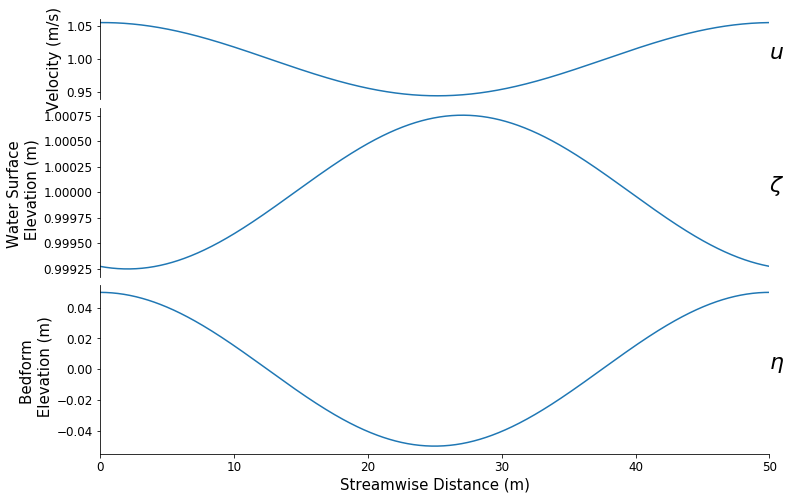

In [8]:
lamb = 50.0 
x = np.linspace(0,lamb,1000)
plotWavyBedform(eta0, lamb, U, g, H, gamma, x)

### Wavelength 1 meter

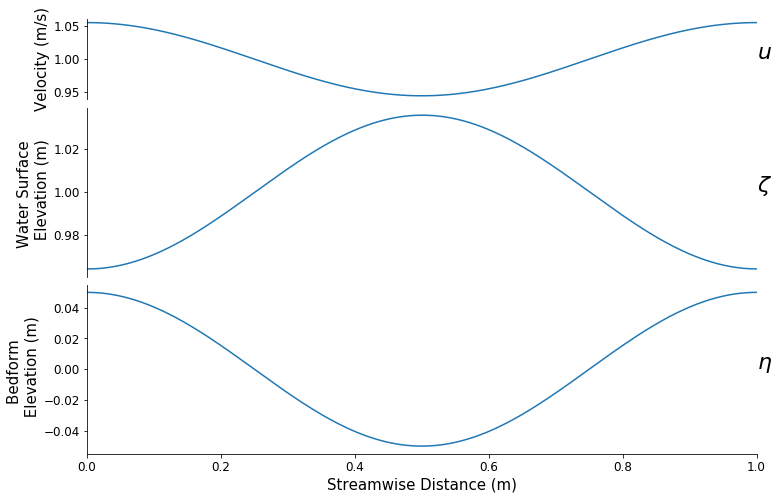

In [9]:
lamb = 1.0 #meters, in place of lambda b/c lambda is a py keyword
x = np.linspace(0,lamb,1000)
plotWavyBedform(eta0, lamb, U, g, H, gamma, x)

The three plots above show that as wavelength shrinks, the crest of the fluid surface waveform centers over the trough of the streambed waveform (the fluid surface waveform approaches a phase angle of $\pi/2$ with respect to the streambed waveform). We also notice that as bedform wavelength shrinks, the amplitude of the fluid surface waveform increases (see the y-axis scale bar). This indicates that as the streambed becomes rougher (bedform wave frequency becomes higher), the response of the fluid surface is more intense and greater roughness appears on the fluid surface.

Although the phase angle of the depth-averaged velocity is not constant with changing bedform wavelength, over the range of wavelength values presented here, it is essentially constant. The amplitude of the velocity waveform, $u_0$ is also essentially constant over the realistic values for $\lambda$ presented here.

## Effects of Streambed Friction Coefficient, $\Gamma$

Estimates of $\Gamma$ in natural streams are on the order of 10$^{-2}$ to 10$^{-3}$ (Furbish, 1998). Under realistic conditions, where $\Gamma$ remains within the range 10$^{-2}$ to 10$^{-3}$, the response of the fluid surface and fluid velocity to changes in streambed friction are insignificant. We will, however, relax the requirement that friction coefficients are realistic to see how the fluid surface and velocity respond to the effects of friction. We explore two values of $\Gamma$, 0.01 and 0.5. Note that we choose a value of 10 meters for $\lambda$, simply because this allows us to see the impacts of $\Gamma$ more clearly.

### Friction Coefficient 0.01

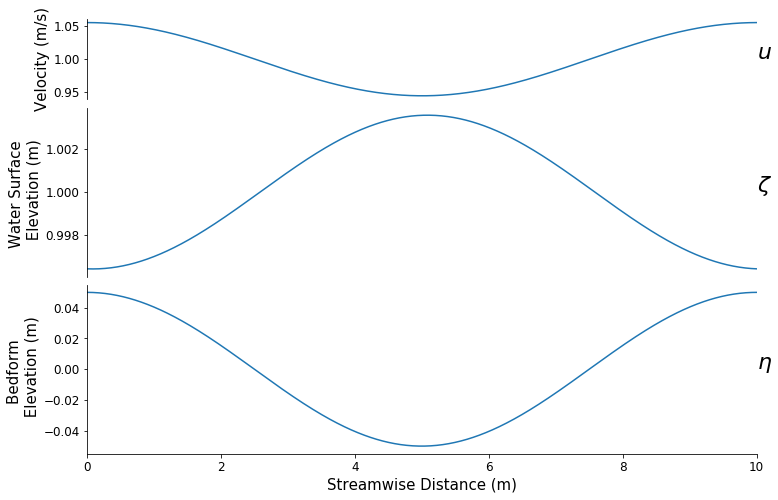

In [10]:
lamb = 10
gamma = 0.01
x = np.linspace(0,lamb,1000)
plotWavyBedform(eta0, lamb, U, g, H, gamma, x)

### Friction Coefficient 0.5

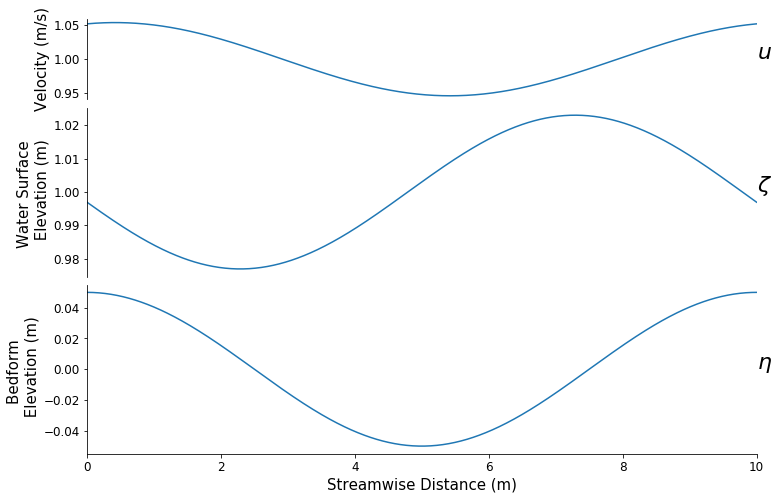

In [11]:
gamma = 0.5
x = np.linspace(0,lamb,1000)
plotWavyBedform(eta0, lamb, U, g, H, gamma, x)

As the friction coefficient increases, $\phi_\zeta$ approaches zero - as streambed friction increases, the fluid surface waveforms aligns with the streambed waveform, with the highest points of the fluid surface aligned directly over the highest points of the bedform. Also as streambed friction increases, fluid surface waveform amplitude $\zeta_0$ increases, meaning that a more frictional streambed creates a more dramatic response in the fluid surface. The effects of $\Gamma$ on $\phi_\zeta$ can be understood from a physical perspective (and, of course, from the equation for $\phi_\zeta$ above). If a streambed is more frictional, more negative momentum is diffused upward into the fluid column from the bed, and fluid particles at the top of the fluid column increasingly obey the forces exerted on the fluid by the streambed. With a less frictional streambed, fluid at the top of the fluid column is not as effected by forces exerted by the streambed, and the water surface and streambed waveforms can be more out of sync with eachother.

Examining the equation for $u_0$ above, we can also see that as $\Gamma$ increases, $u_0$ approaches 0. This indicates that as streambed friction increases, perturbations in depth-averaged streamwise velocity disappear. In simpler terms, a more frictional streambed causes the streamwise fluid velocity to be uniform. Additionally, as friction increases the phase angle of the fluid velocity waveform relative to the streambed waveform , $\phi_u$, approaches $-\pi/2$. This means that as streambed friction increases, maximum flow velocity moves over the lee-side of the bedform bumps. This is difficult to observe in the two plots above, but we do see that in the second plot ($\Gamma = 0.5$) the velocity waveform is shifted forward slightly relative to the velocity waveform in the first plot ($\Gamma = 0.01$).

## Effects of Reach-Averaged Streamwise Velocity, $U$

Fluid flow responds in a surprisingly varied manner to changes in streamwise velocity. Examining a realistic range of values for U, such as from 1 m/s to 10 m/s, reveals that there is a specific velocity within this range that causes both waveform amplitudes $u_0$ and $\zeta_0$ to reach a maximum value, with both amplitudes decreasing away from this characteristic value for U. We can also observe that the phase angle of the fluid surface waveform with respect to the streambed waveform rapidly changes from $\pi$ to 0 and the phase angle of the velocity waveform with respect to the streambed waveform rapidly changes from 0 to $-\pi$ over the characteristic value of U. We can observe the complicated responses of $\zeta_0$, $\phi_\zeta$, $u_0$, and $\phi_u$ by plotting them over a range of U values. We will spare you having to look at the extensive Pyplot code needed to make this graph pretty, but, if you are interested, check out the "/library/amps_phases_varying_w_U.py" file in the parent directory. Note that we reset $\lambda$ and $\Gamma$ to reasonable values and we set $U$ equal to a range of values (excluding 0, which does not make physical sense for a flowing stream which by definition has a finite streamwise velocity).

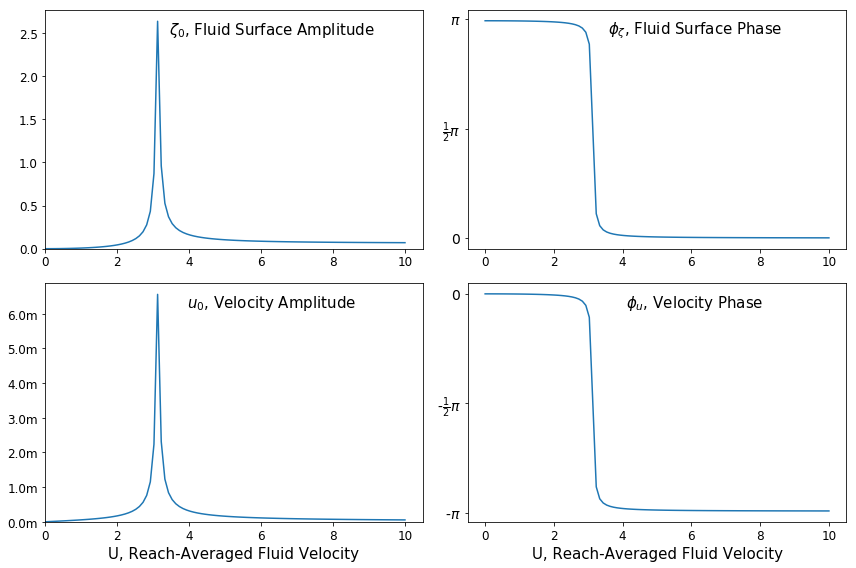

In [12]:
from amps_phases_varying_w_U import plotAmpsPhasesVaryingWithU
lamb = 5
gamma = 0.01
U = np.linspace(10**-4,10,100)
plotAmpsPhasesVaryingWithU(eta0, lamb, U, g, H, gamma)

We see that the characteristic value for U, given the values of all the other parameters, is somewhere around 3 meters per second. These plots also indicate that as $U$ decreases, the expression of the streambed waviness at the fluid surface and in the fluid velocity waveform diminishes towards 0. The plots also demonstrate that as streamwise velocity $U$ increases, the expression of the streambed waviness at the fluid surface, in terms of the fluid surface waveform amplitude $\zeta_0$, approaches a relatively small constant value. 

We can plot the waveforms (as we have above) for $U$ values below, at, and above 3 m/s to see the effects demonstrated in the plot above.

### Streamwise Velocity 1 m/s

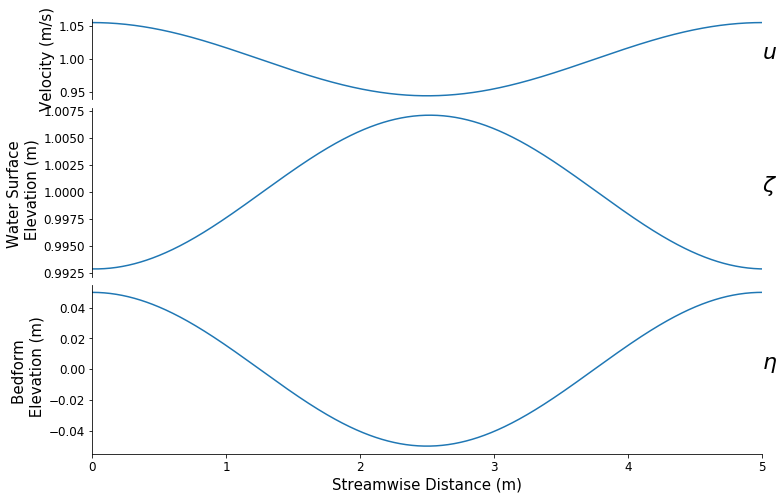

In [13]:
U = 1
x = np.linspace(0,lamb,1000)
plotWavyBedform(eta0, lamb, U, g, H, gamma, x)

### Streamwise Velocity 3 m/s

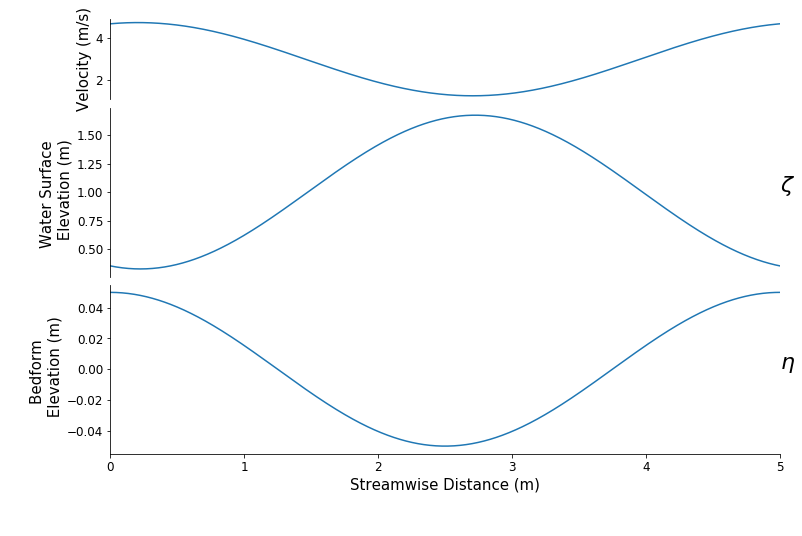

In [14]:
U = 3
x = np.linspace(0,lamb,1000)
plotWavyBedform(eta0, lamb, U, g, H, gamma, x)

### Streamwise Velocity 5 m/s

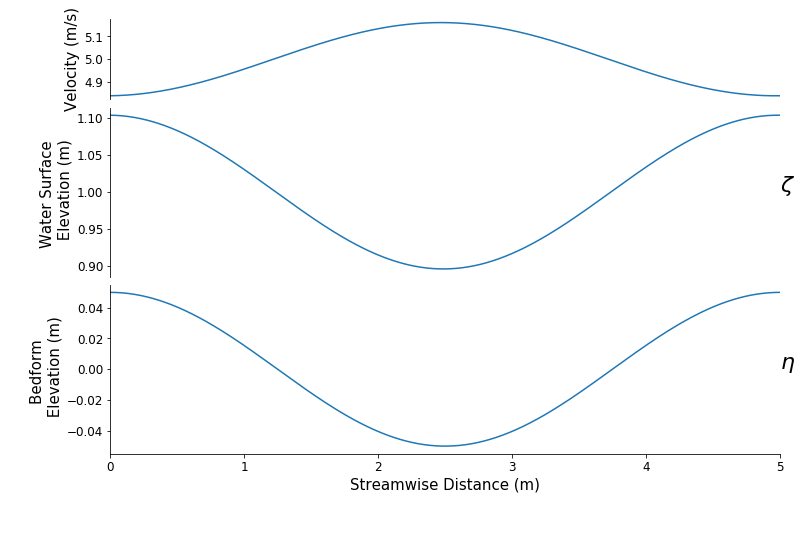

In [15]:
U = 5
x = np.linspace(0,lamb,1000)
plotWavyBedform(eta0, lamb, U, g, H, gamma, x)

Again paying attention to the scale bar of the y-axes in the three figures above, we see that close to the characteristic value of $U$ (around 3 m/s), the amplitudes of the fluid surface and fluid velocity waveforms are maximized. We can also see how the phase angle of the fluid surface waveform relative to the streambed waveform ($\phi_\zeta$) switches from $\pi$ to 0 around $U = 3$ m/s, such that at lower values of $U$ the fluid surface waveform is perfectly *out* of sync with the streambed waveform and at higher values of $U$ the fluid surface waveform is perfectly *in* sync with the streambed waveform. The fluid velocity waveform phase, $\phi_u$, acts oppositely to $\phi_\zeta$, with the fluid velocity waveform perfectly in sync with the streambed waveform at low values of U and perfectly out of sync with the streambed waveform at high values of U.

This behavior is particularly noteworthy because, assuming that our selected parameter values are realistic, it appears that over realistic average streamwise velocities (1-5 m/s), the behavior of the fluid surface and depth-averaged fluid velocity can vary dramatically in a systematic manner.

## Effects of Reach-Averaged Flow Depth, $H$

The final parameter worth examining is the reach-averaged flow depth, H. We will only plot the amplitudes and phase angles as a function of $H$, as we did for $U$ above, as this will suffice to understand how the fluid responds to differing values of $H$ now that we have seen plenty of plots of fluid flow surface height and fluid velocity. Again, we spare you a look at extensive Pyplot code - if you're interested, check out "/library/amps_phases_varying_w_H.py" in the parent directory.

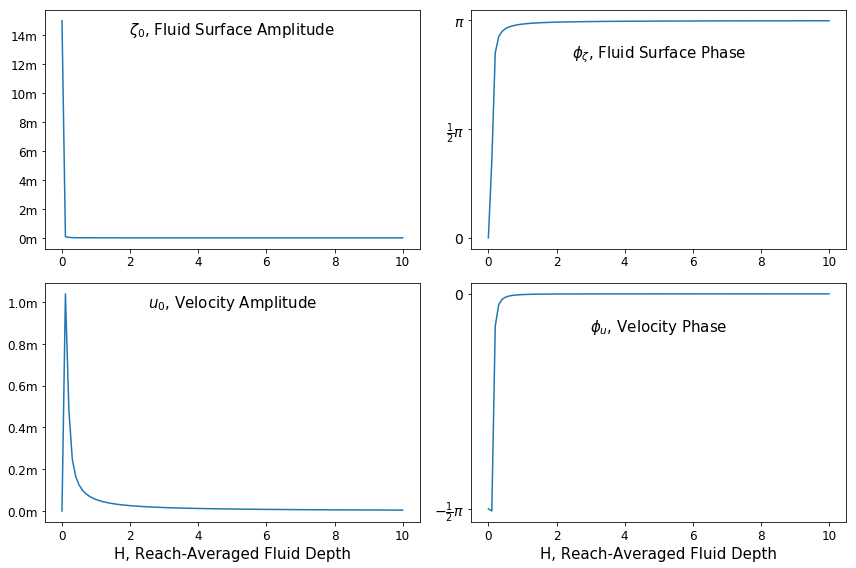

In [20]:
from amps_phases_varying_w_H import plotAmpsPhasesVaryingWithH
H = np.linspace(10**-4,10,100)
eta0 = 0.05
lamb = 10.0
U = 1.0
gamma = 0.01
plotAmpsPhasesVaryingWithH(eta0, lamb, U, g, H, gamma)

These plots allow us to see that as average fluid depth increases, $\zeta_0$ approaches zero. This result is rather intuitive; as a stream becomes deeper, variations in fluid surface height due to a rough streambed become negligible. We would expect the effects of a rough streambed on the fluid surface to diminish with increasing fluid depth because energy perturbations caused by the streambed roughness can diffuse throughout a larger fluid column. Alternately, as fluid depth decreases, the effects of the rough streambed on the fluid surface become increasingly noticeable. At very small (unrealistic) fluid depths, the amplitude of the fluid surface waveform exceeds the depth of the fluid. Although the fluid surface would not remain sinusoidal in such a case, our results do point to an interesting and realistic result - if very shallow fluid flows over a very rough streambed, the fluid surface height will vary greatly and fluid may not even cover portions of the streambed. This might represent a splashy, spraying flow of fluid.

Velocity perturbations ($u_0$) also diminish with increasing fluid depth and seem to diminish at very small fluid depths.

The phase angles are less interesting in the case of increasing fluid depth because both amplitudes $\zeta_0$ and $u_0$ decrease with increasing $H$ and thus the location of the crest/trough of the waves means less as fluid depth increases. As average fluid depth increases, $\phi_\zeta$ approaches $\pi$ and $\phi_u$ approaches 0. Within realistic ranges for $H$, say between 0.5 and 5 meters, the fluid surface waveform will always be out of phase with the streambed waveform by $\pi$ and the velocity waveform will be in phase with the streambed waveform.

# References

Furbish, D.J. Fluid Physics in Geology: An Introduction to Fluid Motions on Earth's Surface and within Its Crust. Oxford University Press. 1996.

Furbish, D.J. Irregular bed forms in steep, rough channels. Water Resources Research, Vol. 34, No. 12, Pages 3635-3659, December 1998.